In [41]:
import pandas as pd
df = pd.read_csv('/home/os/kaggle-dataset/churn_prediction/Churn_prediction_Using_ANN/Data/Churn_Modelling.csv')
print(df.head(5))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [42]:
df.shape

(10000, 14)

In [43]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [44]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


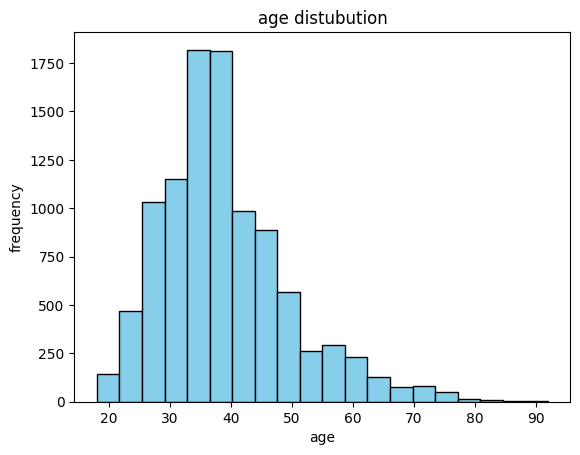

In [47]:
import matplotlib.pyplot as plt

plt.hist(df['Age'],bins = 20,edgecolor = 'black',color = 'skyblue')
plt.title('age distubution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

In [48]:
# count = 0
# for i in df['Age']:
#     if i>:
#         count+=1
# print(count)



In [49]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [50]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [51]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

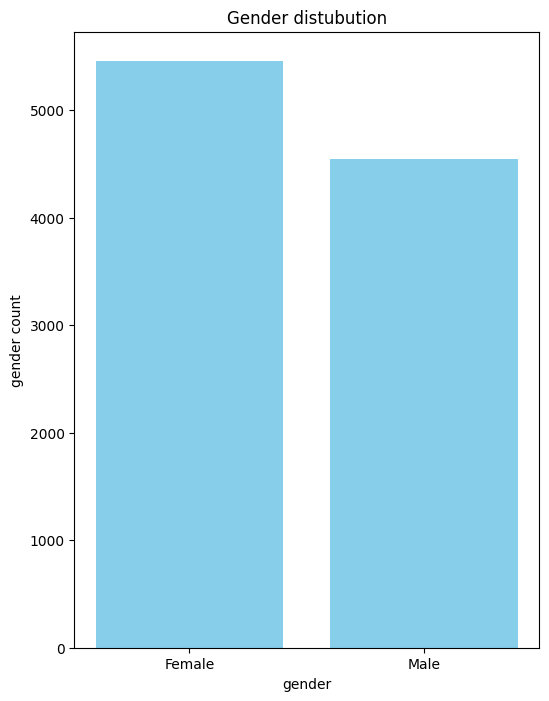

In [52]:
plt.figure(figsize=(6,8))
plt.bar(df['Gender'].unique(),df['Gender'].value_counts(),color = 'skyblue')
plt.title('Gender distubution')
plt.xlabel('gender')
plt.ylabel('gender count')
plt.show()

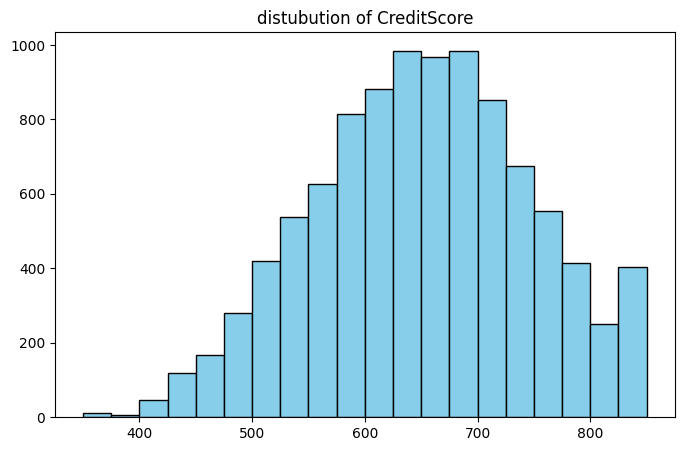

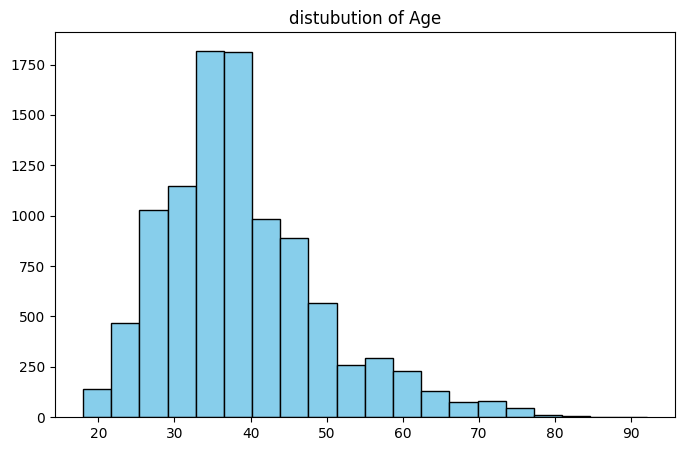

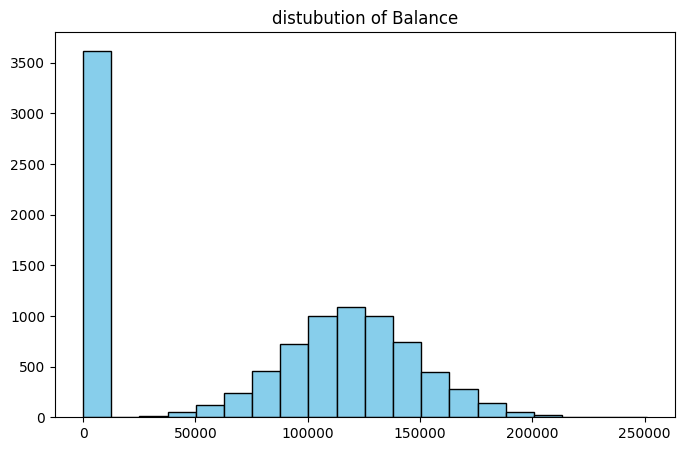

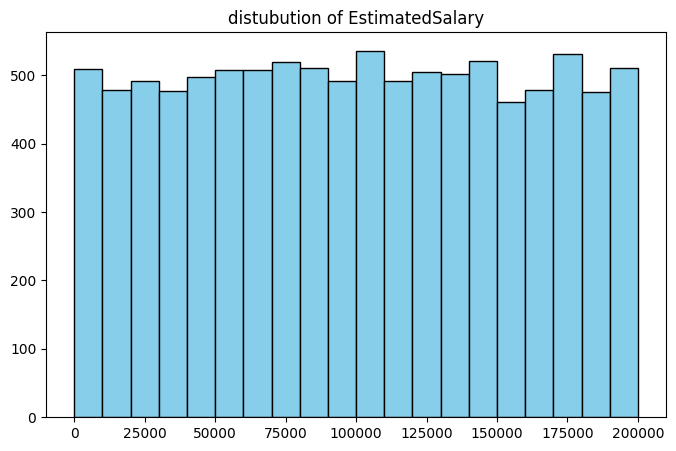

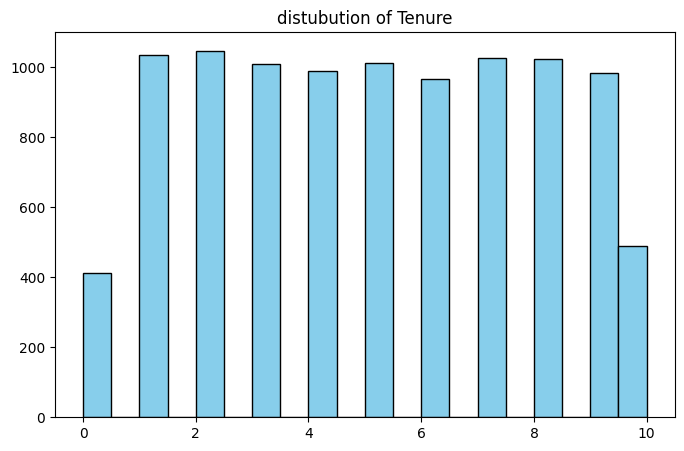

In [53]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
for features in numerical_features:
    plt.figure(figsize=(8,5))
    plt.hist(df[features],bins=20,color = 'skyblue',edgecolor = 'black')
    plt.title(f"distubution of {features}")
    plt.show()

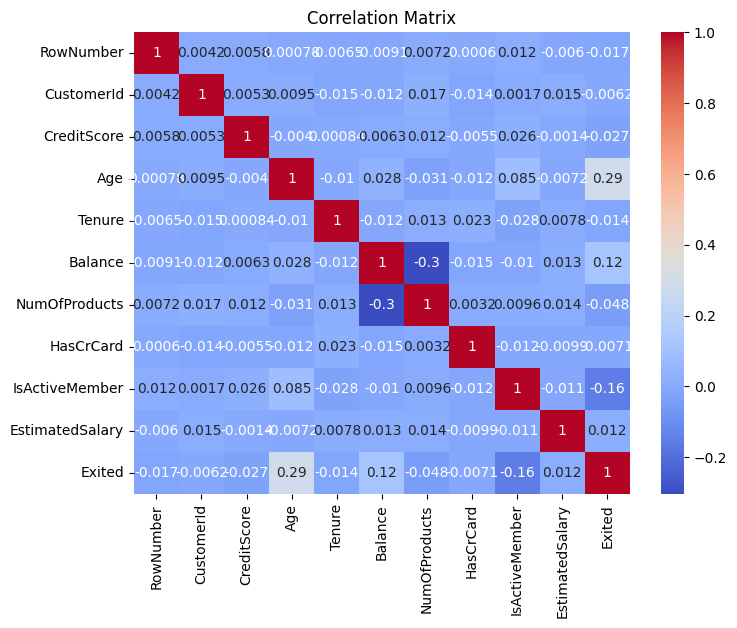

In [54]:
# correlation analysis

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['int64','float']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [55]:
# churn alanysis ( target variable )

# df['Exited'].value_counts(normalize=True)
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

/tmp/ipykernel_57245/3225127634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Exited',data = df,palette='Set2')


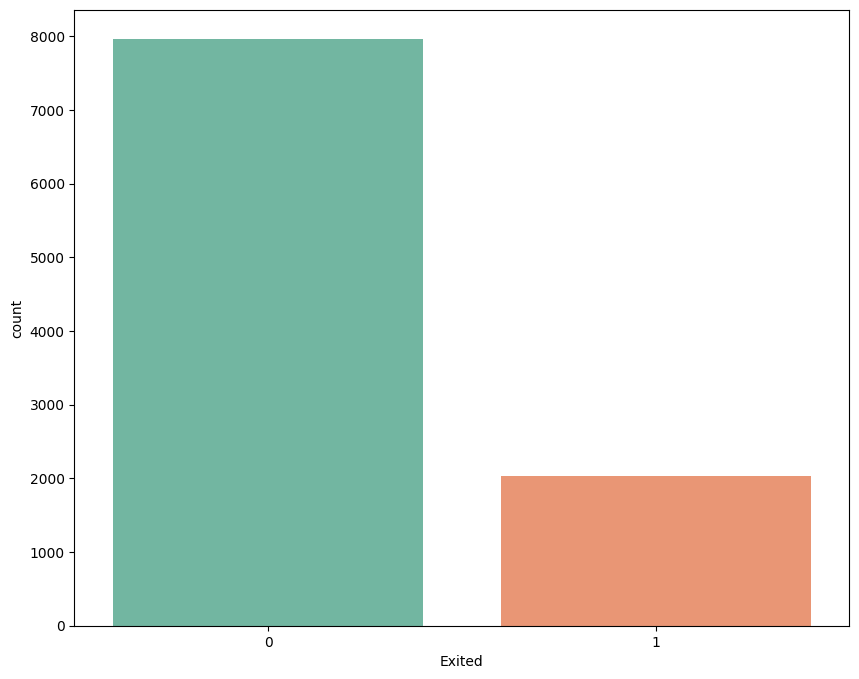

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Exited',data = df,palette='Set2')
plt.show()

/tmp/ipykernel_57245/67899376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df, palette='Set3')


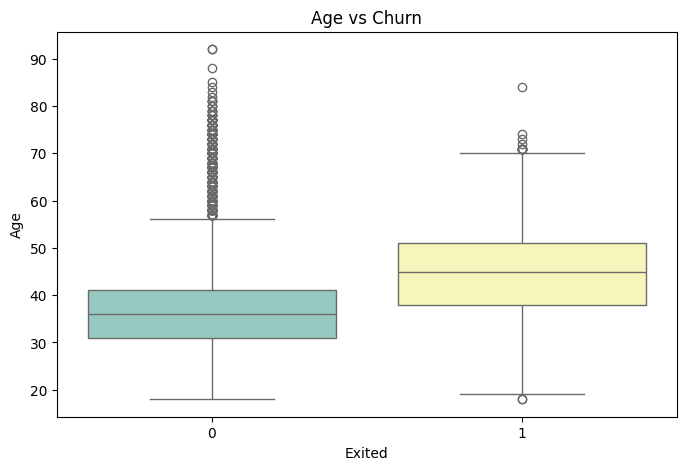

In [57]:
# age vs churn

plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Age', data=df, palette='Set3')
plt.title('Age vs Churn')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()


/tmp/ipykernel_57245/149517303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y='Age', data=df, palette='muted', split=True)


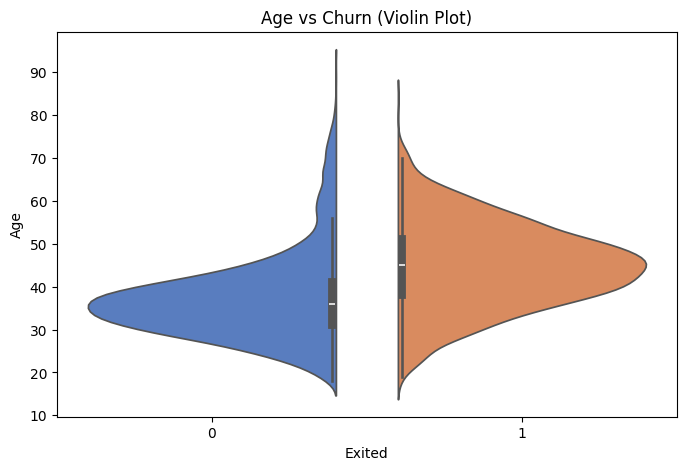

In [58]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Exited', y='Age', data=df, palette='muted', split=True)
plt.title('Age vs Churn (Violin Plot)')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()


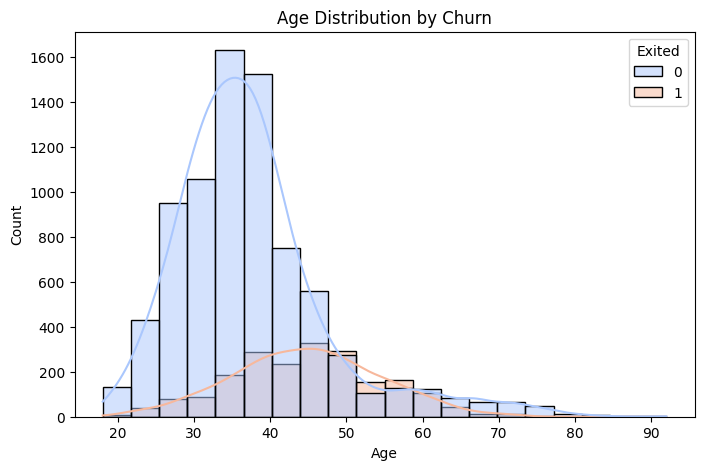

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, palette='coolwarm', bins=20)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_57245/1589678259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='Set2')


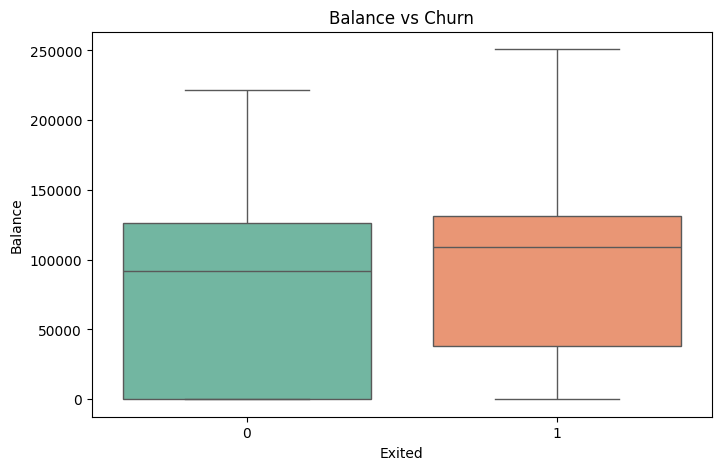

In [60]:
# Example: Balance vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=df, palette='Set2')
plt.title('Balance vs Churn')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()


In [61]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [63]:
# Label Encoding Gender (Male = 1, Female = 0)
df['Gender'] = df['Gender'].astype(str).map({'Male': 1, 'Female': 0})

# One-hot Encoding Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)



In [64]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
5,6,15574012,Chu,645,1,44,8,113755.78,2,1,0,149756.71,1,False,True
6,7,15592531,Bartlett,822,1,50,7,0.00,2,1,1,10062.80,0,False,False
7,8,15656148,Obinna,376,0,29,4,115046.74,4,1,0,119346.88,1,True,False
8,9,15792365,He,501,1,44,4,142051.07,2,0,1,74940.50,0,False,False
9,10,15592389,H?,684,1,27,2,134603.88,1,1,1,71725.73,0,False,False


In [65]:
X = df.drop(['Exited','RowNumber','CustomerId','Surname'],axis = 1)
y = df['Exited']

In [66]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True


In [67]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [68]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)



In [70]:
X_train.shape

(8000, 11)

In [71]:
y_train.shape

(8000,)

In [72]:
# apply smote for imbalance dataste

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_resampled , y_train_resampled = smote.fit_resample(X_train,y_train)

# Check the class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution before SMOTE: Exited
0    6370
1    1630
Name: count, dtype: int64
Class distribution after SMOTE: Exited
1    6370
0    6370
Name: count, dtype: int64


In [73]:
# Check the class distribution after SMOTE
print("Class distribution before SMOTE:", X_train.value_counts())
print("Class distribution after SMOTE:", X_train_resampled.value_counts())

Class distribution before SMOTE: CreditScore  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain
850          1       49   6       128663.90  1              1          0               65769.30         False              False              1
                          5       122486.47  1              0          1               59748.19         False              False              1
                     48   2       0.00       1              1          0               169425.30        False              True               1
                     47   6       0.00       1              1          0               187391.02        False              False              1
                     46   9       117640.39  1              1          0               88920.68         False              False              1
                                                                                                            

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import joblib

X_train_resampled = scaler.fit_transform(X_train_resampled)
joblib.dump(scaler, 'scaler.pkl')

X_test = scaler.transform(X_test)



In [75]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Save the Random Forest model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


In [76]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Save the Logistic Regression model to a file
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

print("Logistic Regression model saved as 'logistic_model.pkl'")


Logistic Regression model saved as 'logistic_model.pkl'


In [77]:
# Load Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Load Logistic Regression model
with open('logistic_model.pkl', 'rb') as file:
    loaded_logistic_model = pickle.load(file)

# Use the loaded models for predictions
rf_predictions = loaded_rf_model.predict(X_test)
logistic_predictions = loaded_logistic_model.predict(X_test)

print("Predictions from Random Forest:", rf_predictions)
print("Predictions from Logistic Regression:", logistic_predictions)


Predictions from Random Forest: [0 0 0 ... 1 0 0]
Predictions from Logistic Regression: [0 1 0 ... 1 0 0]


In [78]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Save the XGBoost model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("XGBoost model saved as 'xgboost_model.pkl'")


XGBoost model saved as 'xgboost_model.pkl'


/home/os/kaggle-dataset/churn_prediction/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:27:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
# Load XGBoost model
with open('xgboost_model.pkl', 'rb') as file:
    loaded_xgb_model = pickle.load(file)

# Use the loaded XGBoost model for predictions
xgb_predictions = loaded_xgb_model.predict(X_test)
print("Predictions from XGBoost:", xgb_predictions)


Predictions from XGBoost: [0 0 0 ... 1 0 0]


In [80]:
from sklearn.metrics import classification_report

# Evaluate Random Forest
print("Random Forest Evaluation:\n", classification_report(y_test, rf_predictions))

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:\n", classification_report(y_test, logistic_predictions))

# Evaluate XGBoost
print("XGBoost Evaluation:\n", classification_report(y_test, xgb_predictions))


Random Forest Evaluation:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1593
           1       0.55      0.63      0.59       407

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000

Logistic Regression Evaluation:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1593
           1       0.41      0.55      0.47       407

    accuracy                           0.74      2000
   macro avg       0.64      0.67      0.65      2000
weighted avg       0.78      0.74      0.76      2000

XGBoost Evaluation:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1593
           1       0.53      0.63      0.58       407

    accuracy                           0.81      2000
   macro avg       0.71      0.74      0.73    